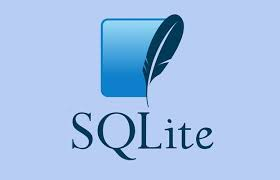

# Exploratory Data Analysis with SQL

This notebook uses the 120 years of Olympics History dataset from Kaggle.

For the purpose of practice of SQL syntax the 1% of the dataset was sampled and loaded into a sqlite database file. Hence, the database table, **`athletes`**, has just 2169 rows unlike the original dataset.

#### List of Questions

- How many olympics games have been held?
- List down all Olympics games held so far.
- Mention the total no of nations who participated in each olympics game?
- Which year saw the highest and lowest no of countries participating in olympics?
- Which nation has participated in all of the olympic games?
- Identify the sport which was played in all summer olympics.
- Which Sports were just played only once in the olympics?
- Fetch the total no of sports played in each olympic games.
- Fetch details of the oldest athletes to win a gold medal.
- Find the Ratio of male and female athletes participated in all olympic games.


# Connect to SQLite DB

In [1]:
# !pip install sqlalchemy
# !pip install ipython-sql

In [2]:
%load_ext sql

In [3]:
import csv, sqlite3

In [4]:
con = sqlite3.connect("athletes.db")
cur = con.cursor()

In [5]:
%sql sqlite:///athletes.db

In [6]:
%%sql

SELECT * FROM athletes LIMIT 10

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
11592,Aranka Binder,F,26.0,163.0,47.0,Individual Olympic Athletes,IOA,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Women's Air Rifle, 10 metres",Bronze
26774,Frederik Albert De Waele,M,33.0,None,None,Belgium,BEL,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Parallel Bars,None
132574,Yang Yun,F,15.0,158.0,40.0,China,CHN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,None
73415,Jan Magiera,M,26.0,178.0,78.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Cycling,"Cycling Men's Road Race, Individual",None
64978,Ludwig Kng,M,26.0,172.0,68.0,Switzerland,SUI,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Lightweight, Freestyle",None
41078,Luc Goiris,M,32.0,196.0,96.0,Belgium,BEL,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,None
93149,Jerneja Perc,F,25.0,168.0,65.0,Slovenia,SLO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 100 metres,None
76151,Elizabeth Ethel Mason,F,52.0,None,None,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",None
15350,Andreas Bronst,M,22.0,171.0,65.0,East Germany,GDR,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Men's Parallel Bars,None
77362,Lee McConnell,F,25.0,178.0,63.0,Great Britain,GBR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,None


#### 1. How many olympics games have been held?

In [7]:
%%sql

SELECT COUNT (DISTINCT GAMES) as Num_of_Games FROM athletes

 * sqlite:///athletes.db
Done.


Num_of_Games
51


#### 2. List down all Olympics games held so far.

In [8]:
%%sql

SELECT DISTINCT GAMES FROM athletes ORDER BY Games

 * sqlite:///athletes.db
Done.


Games
1896 Summer
1900 Summer
1904 Summer
1906 Summer
1908 Summer
1912 Summer
1920 Summer
1924 Summer
1924 Winter
1928 Summer


#### 3. Mention the total no of nations who participated in each olympics game?

In [9]:
%%sql

SELECT Games, COUNT (NOC) FROM athletes GROUP BY Games

 * sqlite:///athletes.db
Done.


Games,COUNT (NOC)
1896 Summer,3
1900 Summer,13
1904 Summer,14
1906 Summer,10
1908 Summer,25
1912 Summer,28
1920 Summer,35
1924 Summer,45
1924 Winter,3
1928 Summer,46


#### 4. Which year saw the highest and lowest no of countries participating in olympics?

In [10]:
%%sql 
SELECT  Year, MIN (Country_count) as Country_Count
FROM (SELECT Year, COUNT (DISTINCT NOC) as Country_count FROM athletes GROUP BY Year)
UNION ALL
SELECT  Year, MAX (Country_count)
FROM (SELECT Year, COUNT (DISTINCT NOC) as Country_count FROM athletes GROUP BY Year)

 * sqlite:///athletes.db
Done.


Year,Country_Count
1904,2
2016,63


#### 5. Fetch the total no of sports played in each olympic games.

In [11]:
%%sql

SELECT Games, COUNT (Sport) FROM athletes GROUP BY Sport ORDER BY Games

 * sqlite:///athletes.db
Done.


Games,COUNT (Sport)
1900 Summer,1
1912 Summer,27
1920 Summer,2
1924 Summer,58
1928 Winter,4
1932 Summer,35
1932 Summer,88
1948 Winter,47
1952 Summer,238
1952 Winter,37


#### 6. Fetch details of the oldest athletes to win a gold medal.

In [12]:
%%sql
SELECT *
from athletes
WHERE Medal = 'Gold'
ORDER BY Age DESC
LImit 1

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57371,Franz Kapus,M,46.0,188.0,92.0,Switzerland-1,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Bobsleigh,Bobsleigh Men's Four,Gold


#### 7. Find the Ratio of male and female athletes participated in all olympic games.

In [13]:
%%sql
select 
    CAST((SELECT COUNT(*) FROM athletes WHERE Sex='M') AS FLOAT)/Count(*) as Male_Ratio,
    CAST((SELECT COUNT(*) FROM athletes WHERE Sex='F') AS FLOAT)/Count(*) as Female_Ratio 
from athletes

 * sqlite:///athletes.db
Done.


Male_Ratio,Female_Ratio
0.6970954356846473,0.3029045643153527


#### 8. How many Gold medals were won during Summer and Winter seasons?

In [14]:
%%sql
select Season, Count(Medal) as Gold_Medals from athletes Where Medal = 'Gold' GROUP BY Season

 * sqlite:///athletes.db
Done.


Season,Gold_Medals
Summer,90
Winter,14


#### 9. What is the age of the heaviest athlete?

In [15]:
%%sql
Select Age as Age_of_Heviest_Athlete, Max(Weight) from athletes

 * sqlite:///athletes.db
Done.


Age_of_Heviest_Athlete,Max(Weight)
25.0,161.0


#### 10. What team won the most Gold medals?

In [18]:
%%sql
SELECT Team as Team_with_Most_Golds, MAX (Medal_count) as Golds_Count
FROM (SELECT Team, COUNT (Medal) as Medal_count FROM athletes Where Medal = 'Gold' GROUP BY Team)

 * sqlite:///athletes.db
Done.


Team_with_Most_Golds,Golds_Count
United States,7


<div class="alert alert-block alert-danger">
    <h1>CLOSE DB CONNECTION!!!</h1>
</div>

In [19]:
con.close()